In [4]:
import numpy as np
import matplotlib.pylab as plt
import cv2
import os

In [2]:
import pickle

In [6]:
# the scanned image info
filepath=os.path.join(os.getcwd(),"TestImages/Big_Microglia.png")
big_image = cv2.imread(filepath)[2000:12000,2000:13000,:]



In [7]:
# read in the response and ram hit ratio    
respone = pickle.load(open('big_image_response','rb'))
ratio = pickle.load(open('big_image_ratio','rb'))


FileNotFoundError: [Errno 2] No such file or directory: 'big_image_response'

In [6]:
# some edge regions of the scanned image are black, they 
# have 'nan' ration, setting these to 0

Nratio = np.nan_to_num(np.asarray(ratio))


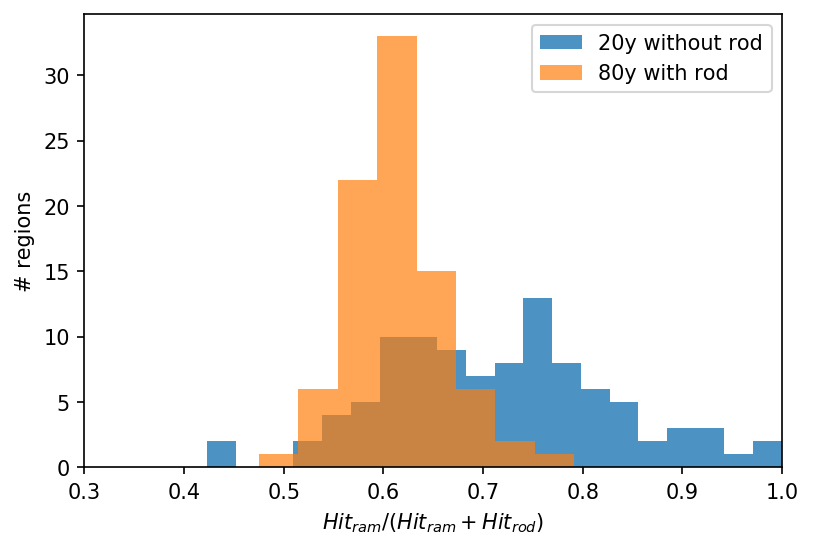

In [47]:
plt.figure(dpi=150)
plt.hist(Nratio,alpha=0.8,bins=20,align='mid')
plt.xlim([0.3,1.0])
plt.xlabel('$Hit_{ram}/(Hit_{ram} + Hit_{rod})$')
plt.ylabel('# regions')
plt.title('histogram of the ram_filte response ratio')
plt.legend()

In [53]:
def assign_color(smallimages,good_ratio):
    '''
    Assign color to each small image according to the good respose ratio
    return colored images
    '''
   
    colors = []
    for i,j in enumerate(good_ratio):
        #first normalize
        
        if j > 0.6:
            color = 'green'
        elif j  > 0 and j <= 0.6:
            color = 'red'
        else: 
            color = 'blue' # the zero ratio
        colors.append(color)
    colored_image = smallimages.copy()
    for i,j in enumerate(colored_image):
        c = colors[i]

        if c == "red":
            j[:,:,0] = 255
        elif c == "yellow":
            j[:,:,0:2] = 255
        elif c == "green":
            j[:,:,1] = 255
        elif c == "blue":
            j[:,:,2] = 255
    return colored_image

In [7]:
def divde_big_image(bigimage,grayscale=True):
    """
    divided the big grayscale image into 
    100 small images
    """
    dx = int(bigimage.shape[0]/10)
    dy = int(bigimage.shape[1]/10)
    
    if grayscale:
        small_images = [bigimage[dx*i:dx*(i+1),dy*j:dy*(j+1)]\
                for i in np.arange(10) for j in np.arange(10)]
    else:
        small_images = [bigimage[dx*i:dx*(i+1),dy*j:dy*(j+1),:]\
                for i in np.arange(10) for j in np.arange(10)]
    return small_images

In [51]:
def draw_colored_image(colored_image,good_ratio,title=None):
    plt.figure(figsize=(10,10))
    idx = 0
    for i in range(10):
        for j in range(10):
            idx += 1
            plt.subplot(10,10,idx)
            plt.imshow(colored_image[idx-1])
            plt.xticks([])
            plt.yticks([])
            plt.subplots_adjust(hspace=0,wspace=0)
            plt.text(0.1,200,'%4.2f' % good_ratio[idx-1],fontsize=9)
    plt.savefig(title+'png')
#plt.imshow(ori_small_images[10])

In [50]:
small_images = divde_big_image(big_image,grayscale=False)

In [54]:
#assign each small image a color based on the ratio of ram_filter 
results = assign_color(small_images,Nratio)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

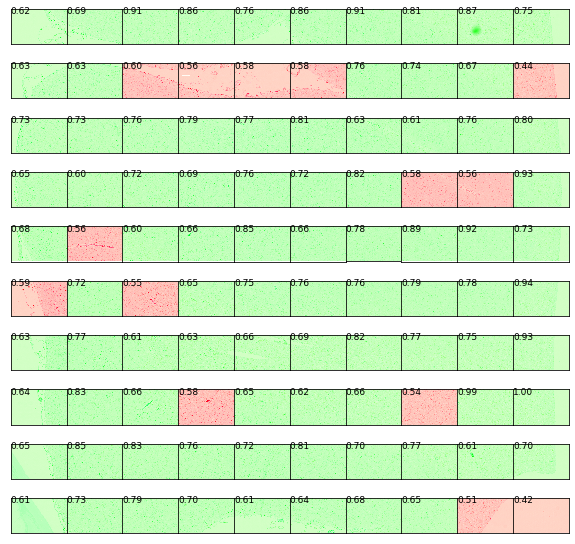

In [59]:
draw_colored_image(results,Nratio)

In [8]:
def pasteImage(image, thresd_image, color):
    '''
    Set the R/G channel value to 255 to hightlight the
    hits from bad/good filter
    '''
    newimage = image.copy()
    if color == 'green':
        newimage[thresd_image==1,1] = 255
    elif color == 'red':
        newimage[thresd_image==1,0] = 255
    elif color == 'yellow':
        newimage[thresd_image==1,0:2] = 255
    return newimage

In [9]:
def generate_colored_images(oriImage,response):
    """
    Color 'green' where good filter has hits, 'red' where bad filter has hits.
    respone is a list containts the thresd SNR image
    """
    colored_images = []
    good_resp = response[0]
    bad_resp  = response[1]
    colored_images.append(pasteImage(oriImage,good_resp,'green'))
    colored_images.append(pasteImage(oriImage,bad_resp,'red'))
    
    return colored_images

In [10]:
original_small_images = divde_big_image(big_image,grayscale=False)


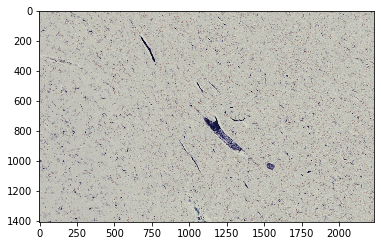

In [11]:
plt.imshow(original_small_images[52])

In [20]:
# typical red region (ID: 37) for the 20 year case
image_37_colored_images = generate_colored_images(original_small_images[37],\
                                                  [big_image_respone[37][0],big_image_response[37][1]])

# typical green region (ID: 36) for the 20 year case
image_36_colored_images = generate_colored_images(original_small_images[36],\
                                                  [big_image_response[36][0],big_image_response[36][1]])

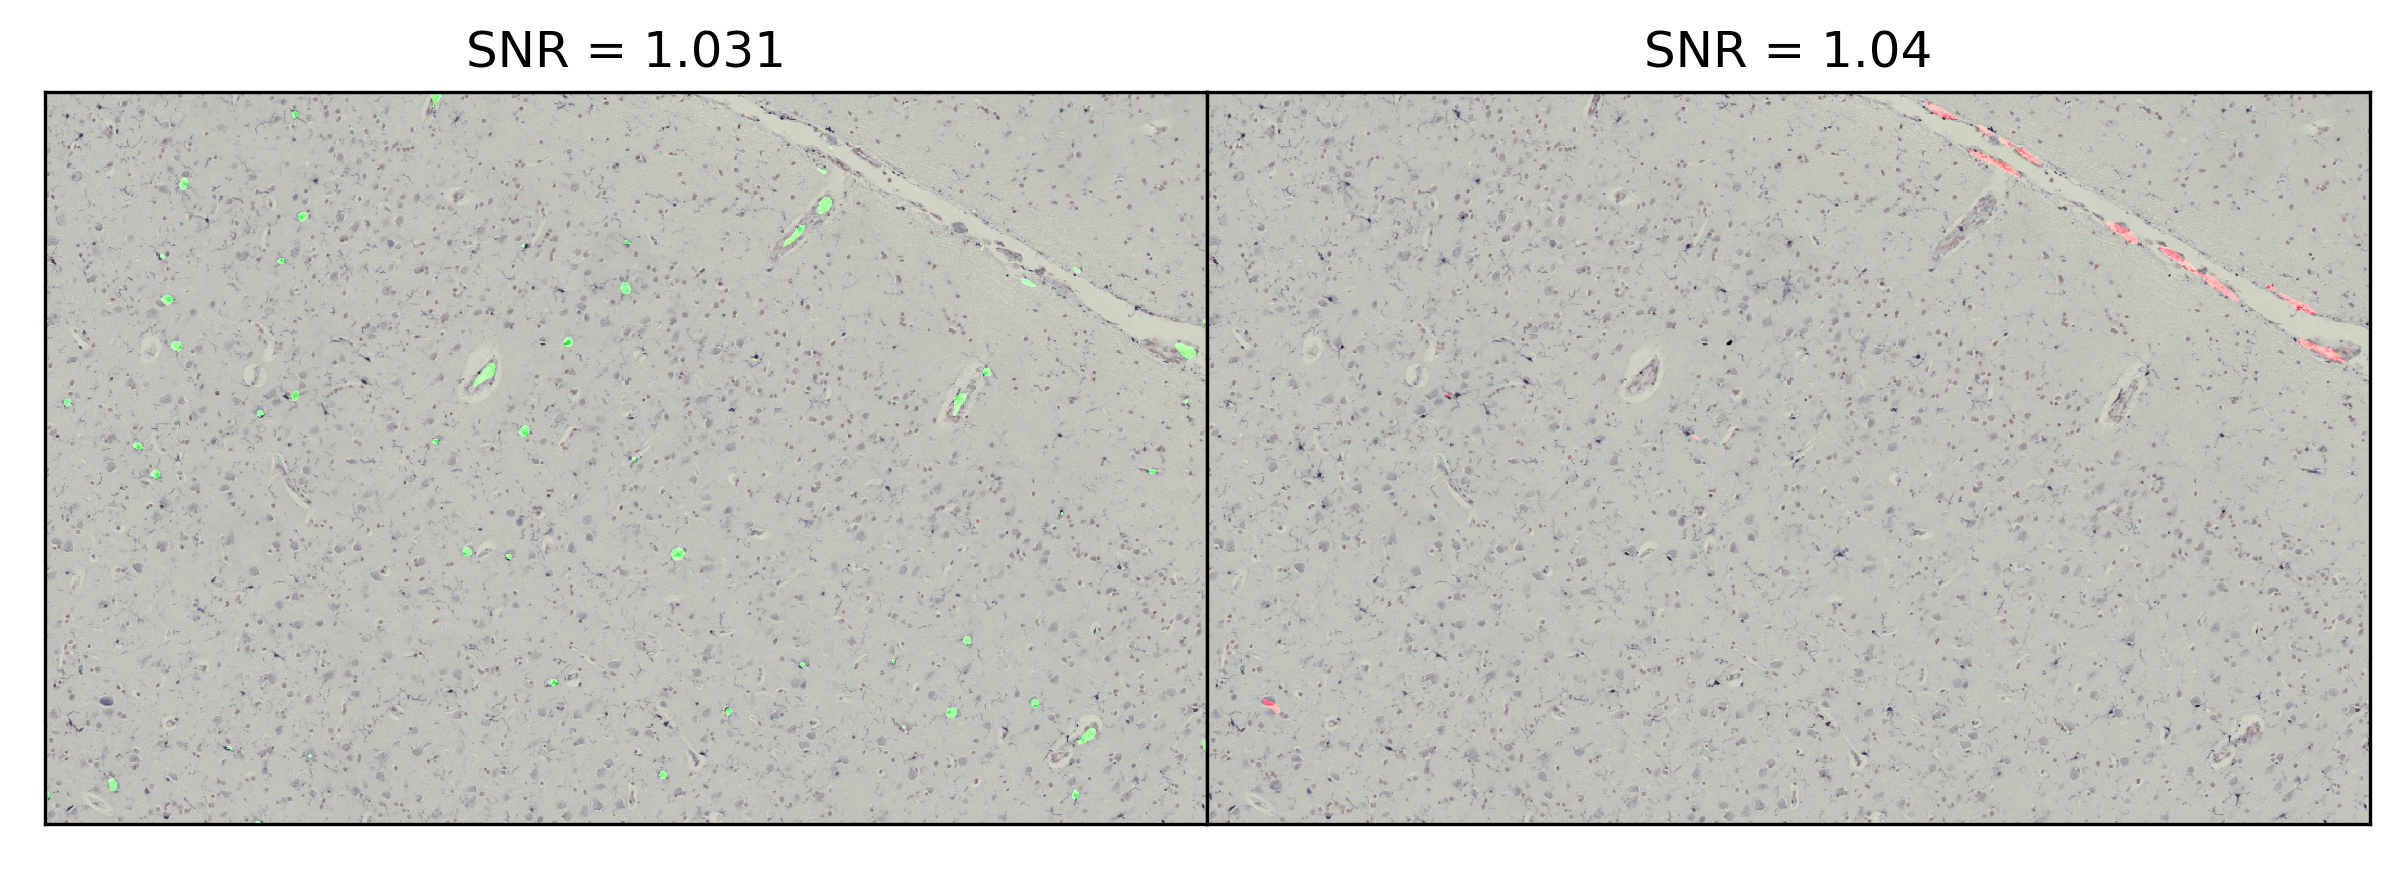

In [24]:
plt.figure(figsize=(10,10),dpi=300)
plt.subplot(1,2,1)
plt.imshow(image_37_colored_images[0])
plt.xticks([])
plt.yticks([])
plt.title('SNR = 1.031')
plt.subplot(1,2,2)
plt.imshow(image_37_colored_images[1])
plt.xticks([])
plt.yticks([])
plt.title('SNR = 1.04')
plt.subplots_adjust(hspace=0,wspace=0)

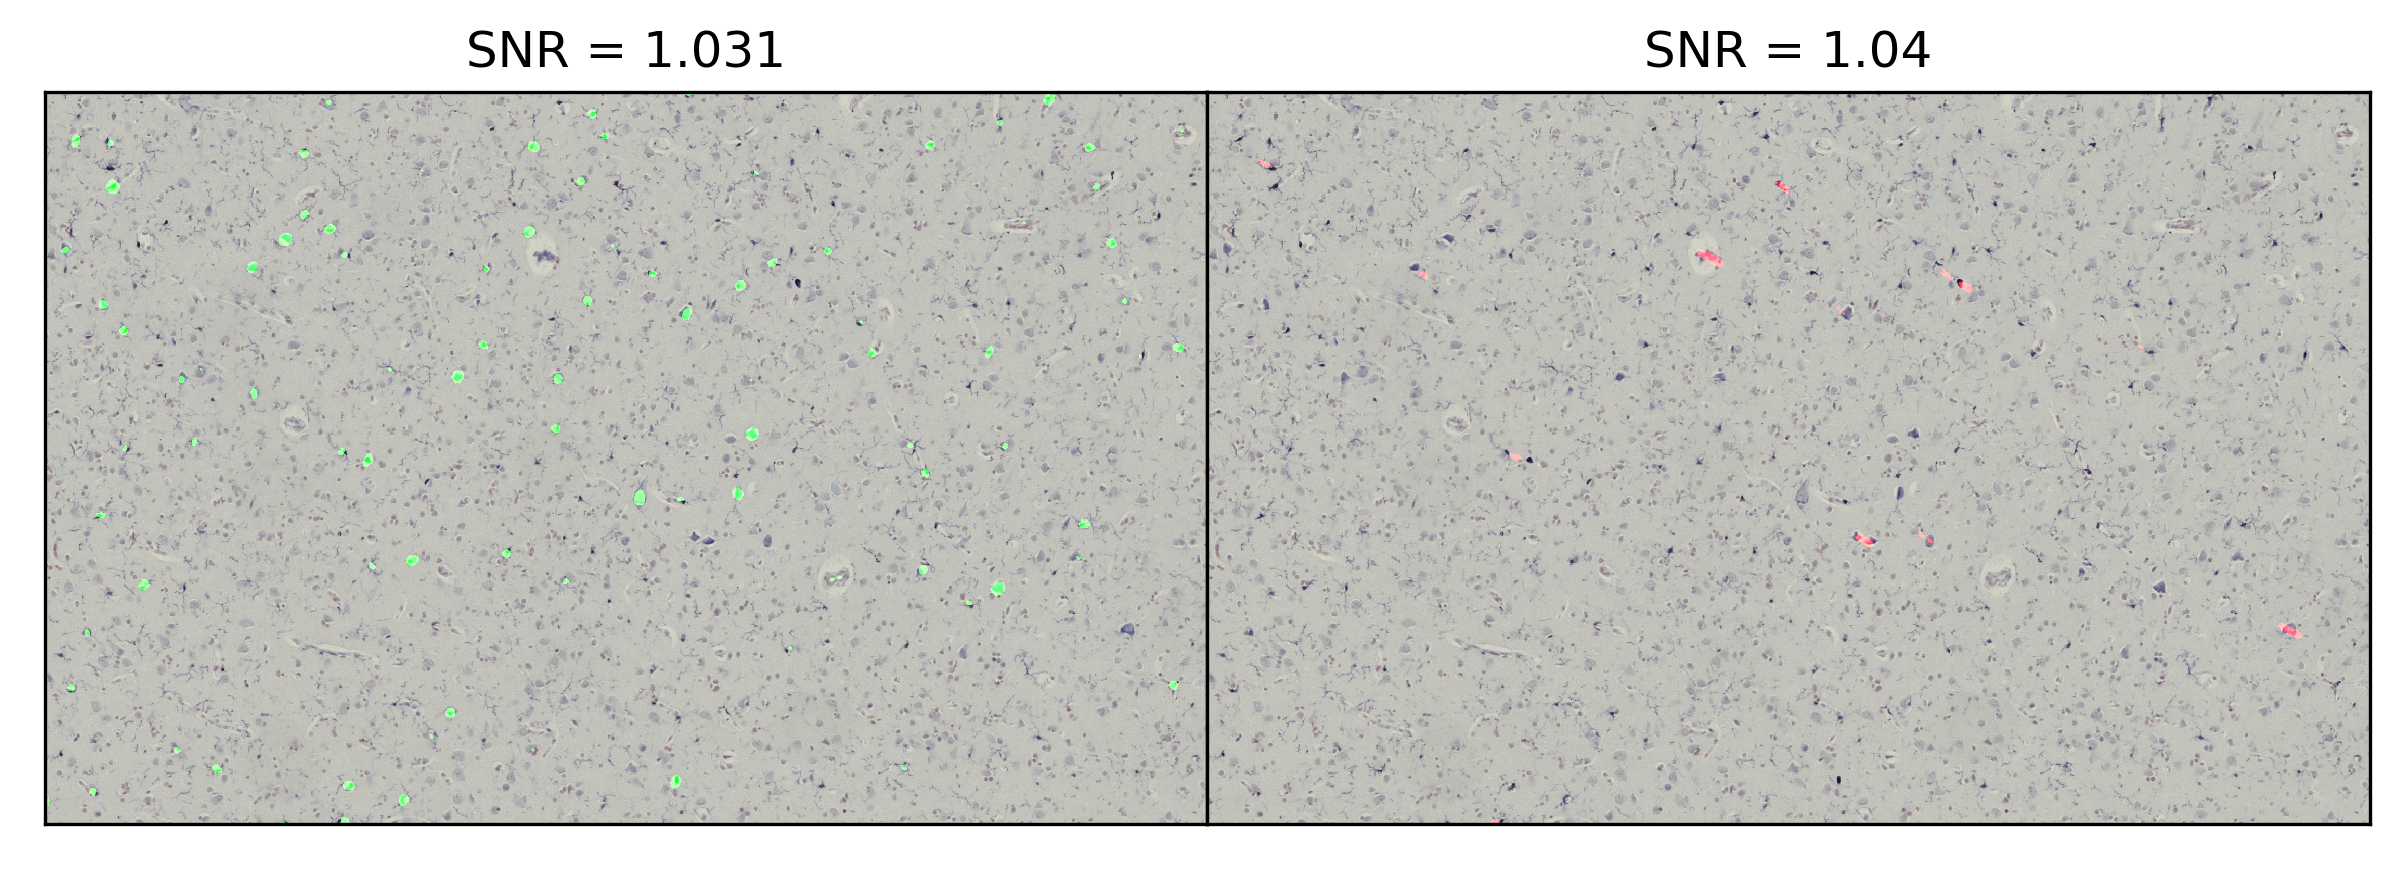

In [25]:
plt.figure(figsize=(10,10),dpi=300)
plt.subplot(1,2,1)
plt.imshow(image_36_colored_images[0])
plt.xticks([])
plt.yticks([])
plt.title('SNR = 1.031')
plt.subplot(1,2,2)
plt.imshow(image_36_colored_images[1])
plt.xticks([])
plt.yticks([])
plt.title('SNR = 1.04')
plt.subplots_adjust(hspace=0,wspace=0)